C:\Users\Tom\AppData\Local\Temp\ipykernel_27428\1098774993.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sales'].fillna(method='pad', inplace=True)
C:\Users\Tom\AppData\Local\Temp\ipykernel_27428\1098774993.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Sales'].fillna(method='pad', inplace=True)
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Inferred freq: MS
INFO:nixtla.nixtla_client:Preproce

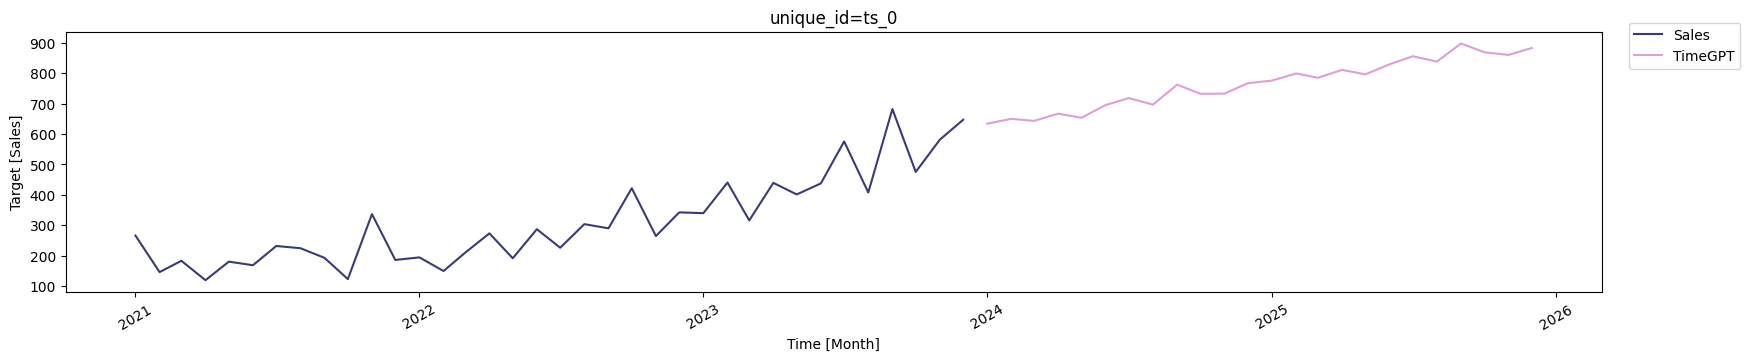

In [6]:
from nixtla import NixtlaClient

import pandas as pd

import plotly.graph_objects as go

#df = pd.read_csv('./data/mul_test.csv')
df = pd.read_csv('./data/shampoo.csv')
df.head()


# CSV 文件的第一列是时间戳，其他列是变量
#df.rename(columns={df.columns[0]: 'ds', df.columns[1]: 'y'}, inplace=True)

#确保时间戳是规则的
df['Month'] = pd.to_datetime(df['Month'])
df = df.set_index('Month').asfreq('MS').reset_index()  # 将频率设置为每日


# 处理缺失值
df['Sales'].fillna(method='pad', inplace=True)


# 提供 X_df
#X_df = df['Open', 'High', 'Low', 'Close', 'Adj Close']

nixtla_clinet = NixtlaClient(# defaults to os.environ.get("TIMEGPT_TOKEN")
       api_key ='nixak-Dwlb7vJzTNvbKpGxYdJDwco0shomWEXfjaXcDaC1UkHi0Ndvfqv3gholUZPhFgaw0zVUD9BnubnLbkpN')


timegpt_fcst_df = nixtla_clinet.forecast(df=df, h=24, time_col='Month', target_col='Sales', model='timegpt-1-long-horizon')
timegpt_fcst_df.head()

nixtla_clinet.plot(df, timegpt_fcst_df, time_col='Month', target_col='Sales')



